In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [325]:
data = pd.read_csv("../Datasets/조업편차분석.csv")
data.head()

,No.,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54
0,1,110.061,1.95173,115.151,27.2738,72.2082,109.967,0.554759,66.9948,75.0693,...,107.429,260.859,558.691,683.693,19.9983,2801.03,8.84598,45.3797,114.402,1.617730
1,2,109.959,1.97996,115.486,27.0532,72.2082,109.967,0.555243,66.9933,75.0509,...,120.007,260.112,556.275,573.348,20.0167,2840.81,8.84598,47.3984,124.647,3.469190
2,3,110.014,2.02079,115.316,27.0514,72.2082,110.079,0.552424,67.0509,75.0693,...,107.091,258.610,551.280,587.005,20.0170,2839.77,8.95819,44.3114,112.848,0.314381
3,4,110.014,2.00120,115.338,27.3179,72.2082,109.967,0.553884,66.9384,75.0521,...,102.485,257.100,566.853,680.226,19.9422,2839.42,8.95819,50.4884,107.954,0.641593
4,5,109.998,2.02360,115.192,27.0411,72.2082,109.967,0.554345,66.9942,75.1441,...,145.825,255.561,557.082,575.577,20.0445,2830.40,8.95819,46.7822,148.394,0.058940


In [326]:
x = data.drop(["No.", "A1"], axis=1).to_numpy()
y = data["A1"].to_numpy().reshape(-1, 1)

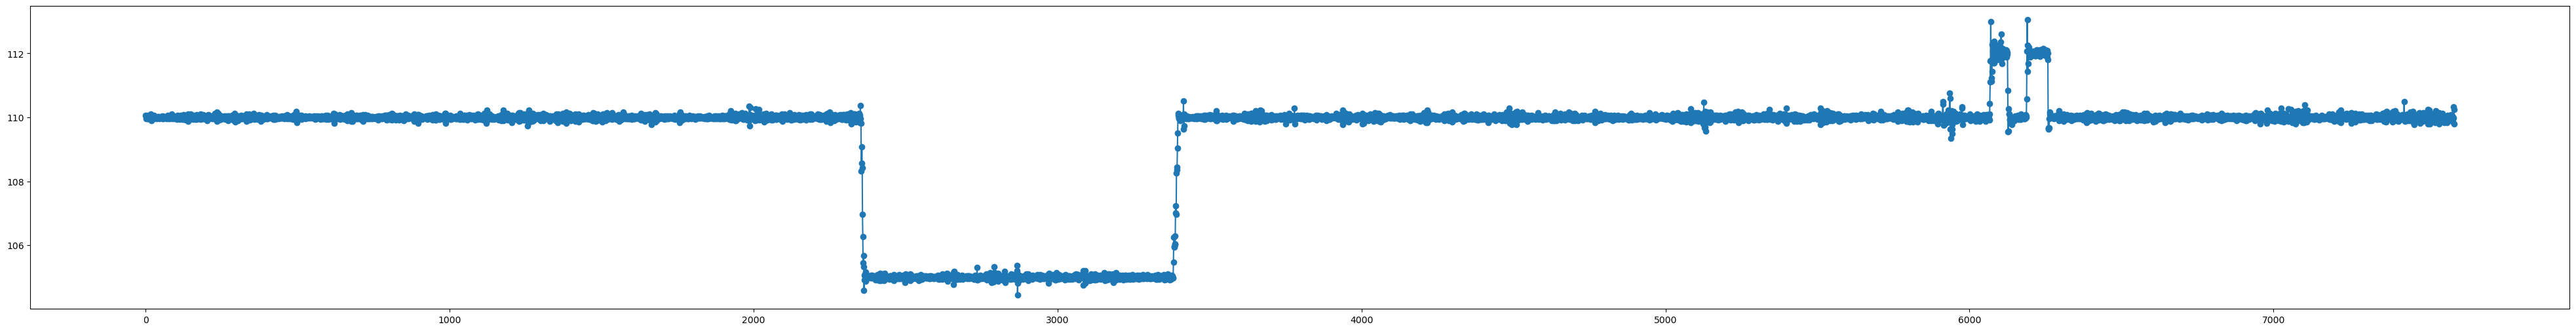

In [327]:
plt.figure(figsize=(50, 6))
plt.plot(y.flatten(), marker="o")
plt.show()

In [328]:
train_ratio = 0.8
train_size = int(x.shape[0] * train_ratio)

In [329]:
def standarize(train, test):
    mean = np.mean(train)
    std = np.std(train)

    scaled_train = (train - mean) / std
    scaled_test = (test- mean) / std

    return scaled_train, scaled_test

In [330]:
x_train, x_test = standarize(x[:train_size], x[train_size:])
y_train, y_test = standarize(y[:train_size], y[train_size:])
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(6076, 53) (1520, 53)
(6076, 1) (1520, 1)


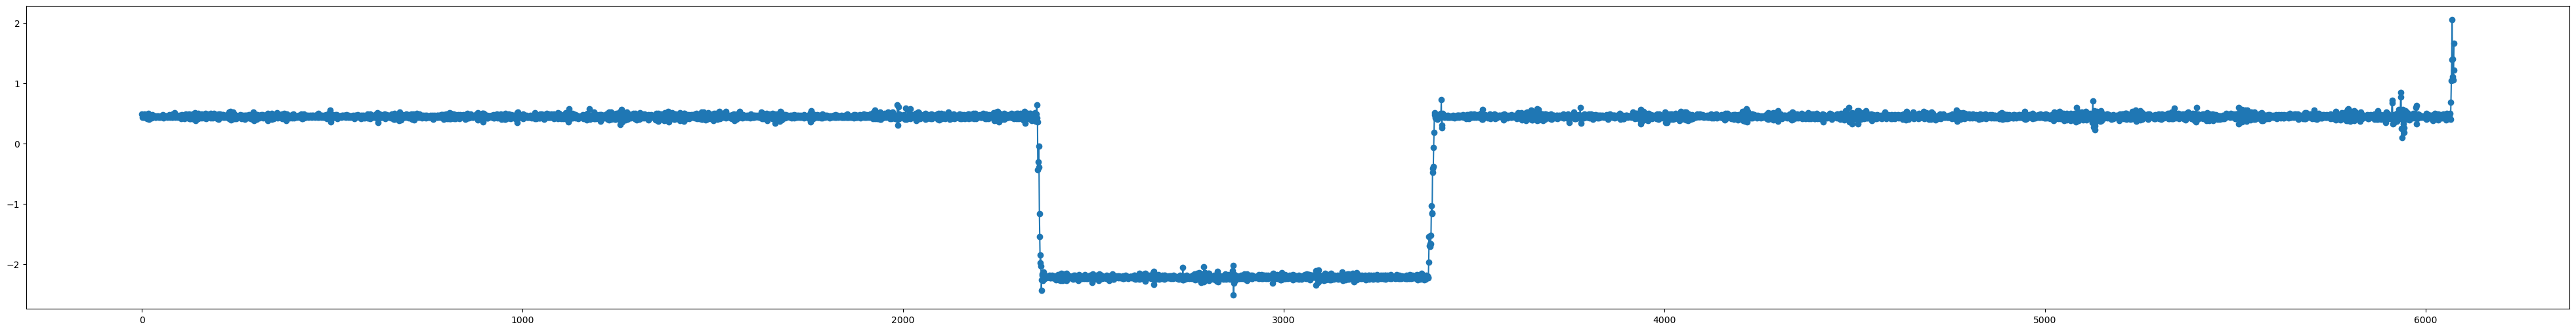

In [331]:
plt.figure(figsize=(50, 6))
plt.plot(y_train.flatten(), marker="o")
plt.show()

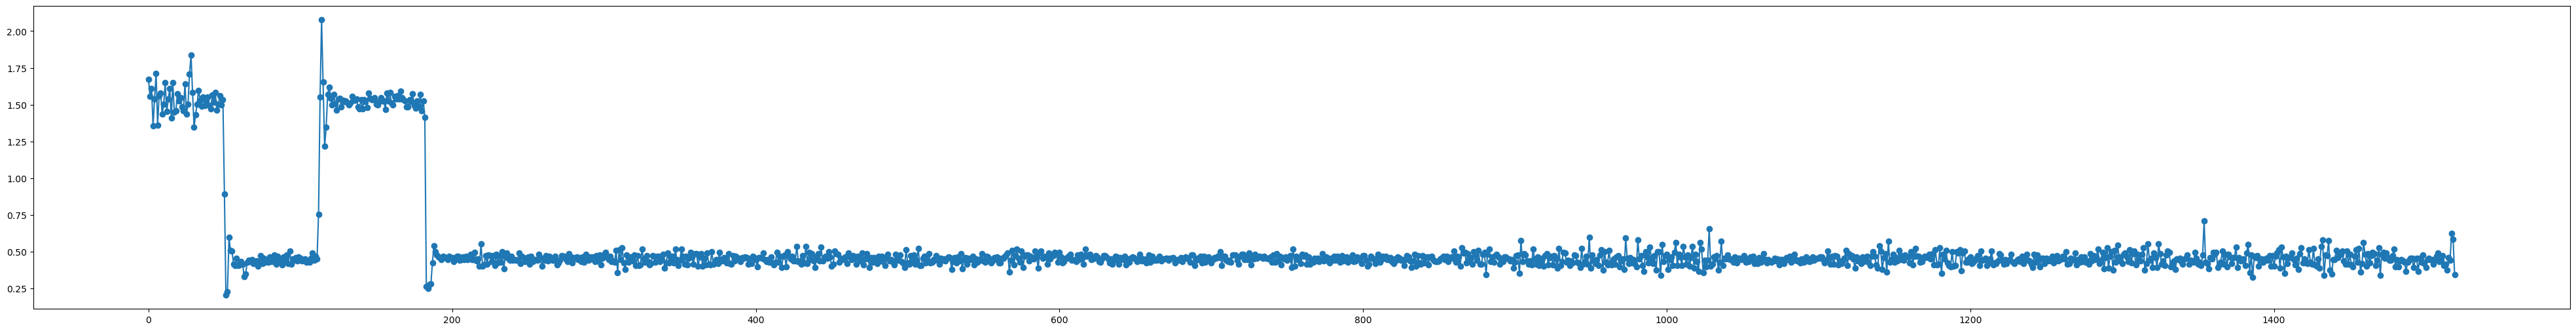

In [332]:
plt.figure(figsize=(50, 6))
plt.plot(y_test.flatten(), marker="o")
plt.show()

In [333]:
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - tanh(z) ** 2

def mse(pred, true):
    return np.mean((pred - true) ** 2)

def mse_derivative(pred, true):
    n_samples = true.shape[0]
    return 2 * (pred - true) / n_samples

In [357]:
input_dim = x_train.shape[1]
hidden_dim = 64
output_dim = y_train.shape[1]

np.random.seed(42)

sqrt_h = np.sqrt(6 / (input_dim + hidden_dim))
sqrt_y = np.sqrt(6 / (hidden_dim + output_dim))

w_x = np.random.uniform(low=-sqrt_h, high=sqrt_h, size=(hidden_dim, input_dim))
w_h = np.random.uniform(low=-sqrt_h, high=sqrt_h, size=(hidden_dim, hidden_dim))
w_y = np.random.uniform(low=-sqrt_y, high=sqrt_y, size=(output_dim, hidden_dim))

b_h = np.zeros((hidden_dim, 1))
b_y = np.zeros((output_dim, 1))

In [ ]:
def forward_prop(x, hidden_dim, w_x, w_h, w_y, b_h, b_y):
    h_states = []
    outputs = []
    h_prev = np.zeros((hidden_dim, 1))

    T = x.shape[0]
    for t in range(T):
        x_t = x[t].reshape(-1, 1)
        h_t = tanh(np.dot(w_x, x_t) + np.dot(w_h, h_prev) + b_h)
        y_t = np.dot(w_y, h_t) + b_y
        h_prev = h_t

        h_states.append(h_prev)
        outputs.append(y_t)
        
    return np.array(h_states), np.array(outputs).reshape(-1, 1)

In [360]:
h_states_forward, y_pred_forward = forward_prop(x_train, hidden_dim, w_x, w_h, w_y, b_h, b_y)
print(y_pred_forward)
print(h_states_forward.shape, y_pred_forward.shape)

(1, 1, 1)
(2, 1, 1)
(3, 1, 1)
(4, 1, 1)
(5, 1, 1)
(6, 1, 1)
(7, 1, 1)
(8, 1, 1)
(9, 1, 1)
(10, 1, 1)
(11, 1, 1)
(12, 1, 1)
(13, 1, 1)
(14, 1, 1)
(15, 1, 1)
(16, 1, 1)
(17, 1, 1)
(18, 1, 1)
(19, 1, 1)
(20, 1, 1)
(21, 1, 1)
(22, 1, 1)
(23, 1, 1)
(24, 1, 1)
(25, 1, 1)
(26, 1, 1)
(27, 1, 1)
(28, 1, 1)
(29, 1, 1)
(30, 1, 1)
(31, 1, 1)
(32, 1, 1)
(33, 1, 1)
(34, 1, 1)
(35, 1, 1)
(36, 1, 1)
(37, 1, 1)
(38, 1, 1)
(39, 1, 1)
(40, 1, 1)
(41, 1, 1)
(42, 1, 1)
(43, 1, 1)
(44, 1, 1)
(45, 1, 1)
(46, 1, 1)
(47, 1, 1)
(48, 1, 1)
(49, 1, 1)
(50, 1, 1)
(51, 1, 1)
(52, 1, 1)
(53, 1, 1)
(54, 1, 1)
(55, 1, 1)
(56, 1, 1)
(57, 1, 1)
(58, 1, 1)
(59, 1, 1)
(60, 1, 1)
(61, 1, 1)
(62, 1, 1)
(63, 1, 1)
(64, 1, 1)
(65, 1, 1)
(66, 1, 1)
(67, 1, 1)
(68, 1, 1)
(69, 1, 1)
(70, 1, 1)
(71, 1, 1)
(72, 1, 1)
(73, 1, 1)
(74, 1, 1)
(75, 1, 1)
(76, 1, 1)
(77, 1, 1)
(78, 1, 1)
(79, 1, 1)
(80, 1, 1)
(81, 1, 1)
(82, 1, 1)
(83, 1, 1)
(84, 1, 1)
(85, 1, 1)
(86, 1, 1)
(87, 1, 1)
(88, 1, 1)
(89, 1, 1)
(90, 1, 1)
(91, 1, 1)
(92, 1, 

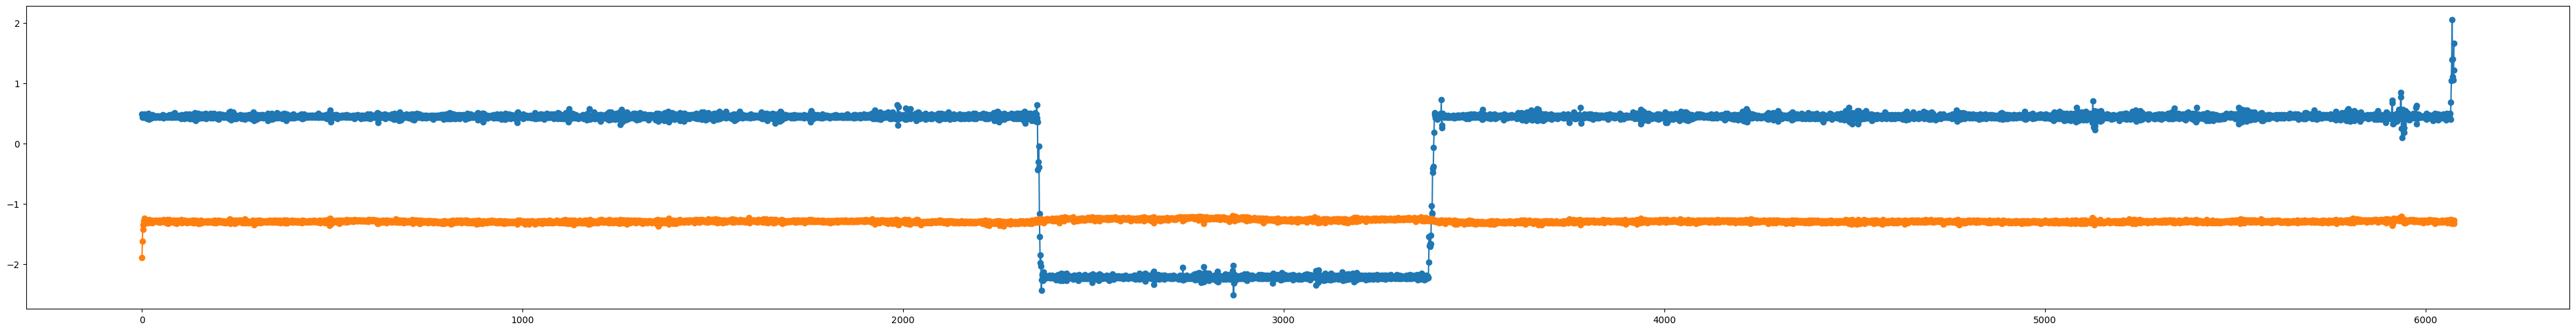

In [337]:
plt.figure(figsize=(50, 6))
plt.plot(y_train.flatten(), marker="o")
plt.plot(y_pred_forward.flatten(), marker="o")
plt.show()

In [338]:
def backward_prop(x, y_pred, y_true, h_states, w_x, w_h, w_y, b_h, b_y, learning_rate, clip_value):
    dw_x = np.zeros_like(w_x)
    dw_h = np.zeros_like(w_h)
    dw_y = np.zeros_like(w_y)
   
    db_h = np.zeros_like(b_h)
    db_y = np.zeros_like(b_y)
    
    dh_next = np.zeros((hidden_dim, 1))

    T = len(x)
    for t in reversed(range(T)):
        x_t = x[t].reshape(-1, 1)
        h_t = h_states[t].reshape(-1, 1)
        h_prev = h_states[t - 1].reshape(-1, 1) if t > 0 else np.zeros_like(h_t)

        dy_t =  y_pred[t].reshape(-1, 1) - y_true[t].reshape(-1, 1)
        dw_y += np.dot(dy_t, h_t.T)
        db_y += dy_t

        dh_t = np.dot(w_y.T, dy_t) + dh_next
        dh_raw = dh_t * tanh_derivative(h_t)

        dw_x += np.dot(dh_raw, x_t.T)
        dw_h += np.dot(dh_raw, h_prev.T)
        db_h += dh_raw

        dh_next = np.dot(w_h.T, dh_raw)

    dw_x = np.clip(dw_x, -clip_value, clip_value)
    dw_h = np.clip(dw_h, -clip_value, clip_value)
    dw_y = np.clip(dw_y, -clip_value, clip_value)
    db_h = np.clip(db_h, -clip_value, clip_value)
    db_y = np.clip(db_y, -clip_value, clip_value)

    w_x -= learning_rate * dw_x
    w_h -= learning_rate * dw_h
    w_y -= learning_rate * dw_y
    b_h -= learning_rate * db_h
    b_y -= learning_rate * db_y

    return w_x, w_h, w_y, b_h, b_y

In [349]:
h_states_forward, y_pred_forward = forward_prop(x_train, hidden_dim, w_x, w_h, w_y, b_h, b_y)
w_x_backward, w_h_backward, w_y_backward, b_h_backward, b_y_backward = backward_prop(x_train, y_pred_forward, y_train, h_states_forward, w_x, w_h, w_y, b_h, b_y, 0.01, 0.5)
h_states_backward, y_pred_backward = forward_prop(x_train, hidden_dim, w_x_backward, w_h_backward, w_y_backward, b_h_backward, b_y_backward)

6076
6076


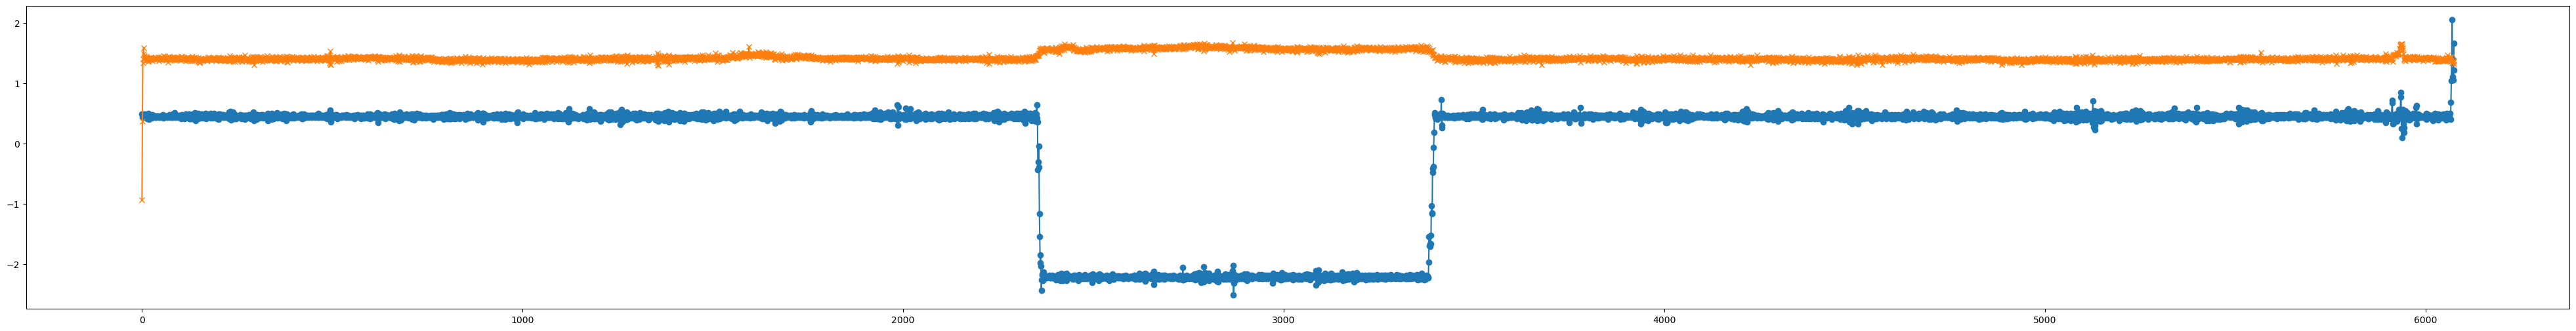

In [340]:
plt.figure(figsize=(50, 6))
plt.plot(y_train.flatten(), marker="o")
plt.plot(y_pred_backward.flatten(), marker="x")
plt.show()

In [341]:
epochs = 100
lr = 0.0001
clip_value = 2.0
loss_list = []

for epoch in range(epochs):
    h_states, y_pred = forward_prop(x_train, hidden_dim, w_x, w_h, w_y, b_h, b_y)
    loss = mse(y_pred, y_train)
    loss_list.append(loss)

    w_x, w_h, w_y, b_h, b_y = backward_prop(x_train, y_pred, y_train, h_states, w_x, w_h, w_y, b_h, b_y, lr, clip_value)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss}")

Epoch 10, Loss: 1.0876431383182454
Epoch 20, Loss: 0.9053842075421111
Epoch 30, Loss: 0.7859969538522215
Epoch 40, Loss: 0.6835349477973551
Epoch 50, Loss: 0.5863641389815722
Epoch 60, Loss: 0.5035673580525848
Epoch 70, Loss: 0.44688872730378904
Epoch 80, Loss: 0.4095113576222638
Epoch 90, Loss: 0.3754209810893379
Epoch 100, Loss: 0.34294131451050175


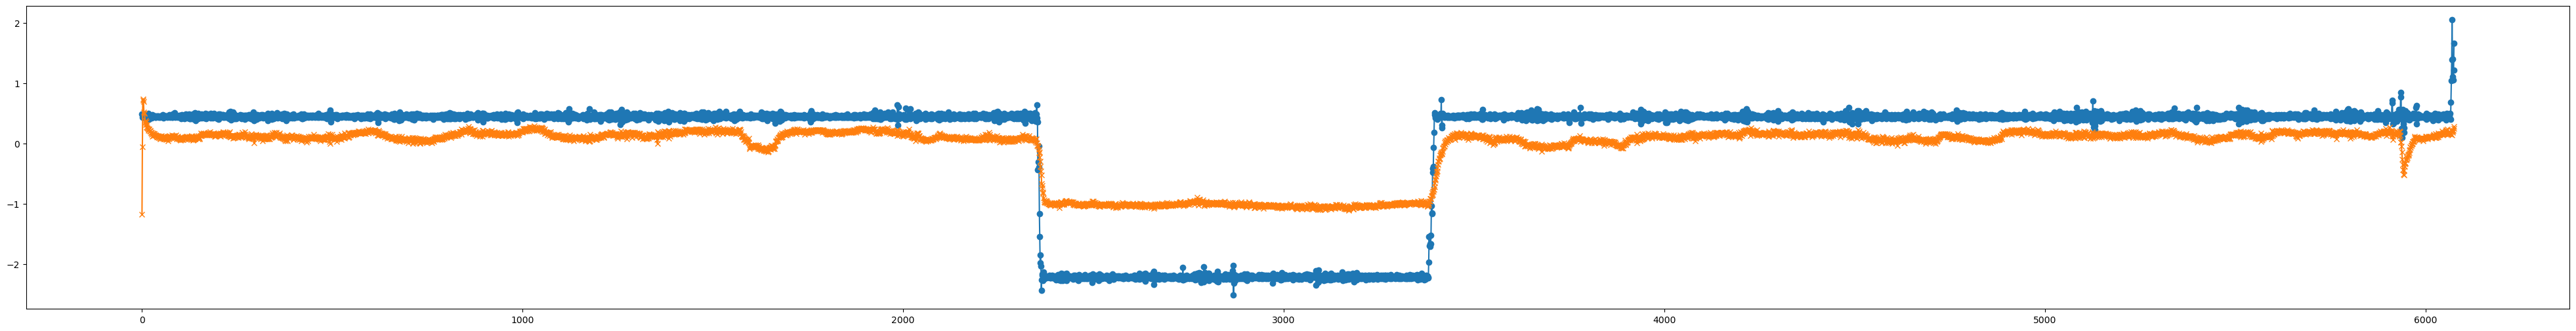

In [342]:
plt.figure(figsize=(50, 6))
plt.plot(y_train.flatten(), marker="o")
plt.plot(y_pred.flatten(), marker="x")
plt.show()

(1, 64, 1)
(2, 64, 1)
(3, 64, 1)
(4, 64, 1)
(5, 64, 1)
(6, 64, 1)
(7, 64, 1)
(8, 64, 1)
(9, 64, 1)
(10, 64, 1)
(11, 64, 1)
(12, 64, 1)
(13, 64, 1)
(14, 64, 1)
(15, 64, 1)
(16, 64, 1)
(17, 64, 1)
(18, 64, 1)
(19, 64, 1)
(20, 64, 1)
(21, 64, 1)
(22, 64, 1)
(23, 64, 1)
(24, 64, 1)
(25, 64, 1)
(26, 64, 1)
(27, 64, 1)
(28, 64, 1)
(29, 64, 1)
(30, 64, 1)
(31, 64, 1)
(32, 64, 1)
(33, 64, 1)
(34, 64, 1)
(35, 64, 1)
(36, 64, 1)
(37, 64, 1)
(38, 64, 1)
(39, 64, 1)
(40, 64, 1)
(41, 64, 1)
(42, 64, 1)
(43, 64, 1)
(44, 64, 1)
(45, 64, 1)
(46, 64, 1)
(47, 64, 1)
(48, 64, 1)
(49, 64, 1)
(50, 64, 1)
(51, 64, 1)
(52, 64, 1)
(53, 64, 1)
(54, 64, 1)
(55, 64, 1)
(56, 64, 1)
(57, 64, 1)
(58, 64, 1)
(59, 64, 1)
(60, 64, 1)
(61, 64, 1)
(62, 64, 1)
(63, 64, 1)
(64, 64, 1)
(65, 64, 1)
(66, 64, 1)
(67, 64, 1)
(68, 64, 1)
(69, 64, 1)
(70, 64, 1)
(71, 64, 1)
(72, 64, 1)
(73, 64, 1)
(74, 64, 1)
(75, 64, 1)
(76, 64, 1)
(77, 64, 1)
(78, 64, 1)
(79, 64, 1)
(80, 64, 1)
(81, 64, 1)
(82, 64, 1)
(83, 64, 1)
(84, 64, 1)
(

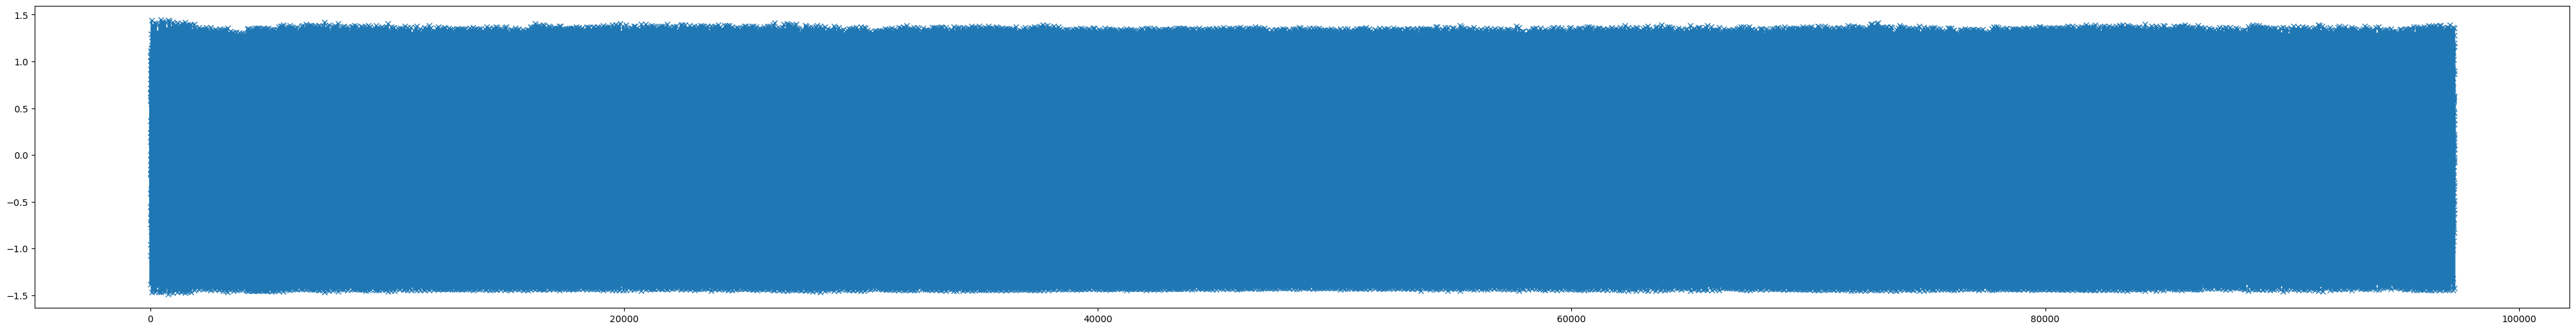

In [359]:
h, y_outputs = forward_prop(x_test, hidden_dim, w_x, w_y, w_h, b_h, b_y)

plt.figure(figsize=(50, 6))
# plt.plot(y_test.flatten(), marker="o")
plt.plot(y_outputs, marker="x")
plt.show()

In [344]:
print(w_x.shape)

(100, 53)


In [345]:
print(w_h.shape)
print(w_y.shape)

(100, 100)
(1, 100)


In [346]:
print(y_outputs.shape)

(152000, 1)
